# Clássico problema do Titanic

Uma das mais famosas competições de Machine Learning do Kaggle é o problema do **Titanic**. É um desafio para iniciantes onde é preciso prever quais passageiros sobreviveriam ao desastre.

Primeira tarefa: entender os dados. 

O dataset contém as seguintes colunas:
- **PassengerId**: número de identificação do passageiro
- **Survived**: 0 se o passageiro não sobreviveu ou 1 se o passageiro sobreviveu.
- **Pclass**: classe na qual o passageiro viajou. 1 para primeira classe, 2 para segunda classe e 3 para terceira classe.
- **Name**: nome do passageiro.
- **Sex**: sexo do passageiro.
- **Age**: idade do passageiro.
- **SibSp**: quantidade de irmãos e cônjuges a bordo.
- **Parch**: quantidade de pais e filhos a bordo.
- **Tocket**: número da passagem.
- **Fare**: preço da passagem.
- **Cabin**: número da cabine do passageiro.
- **Embarked**: o porto na qual o passageiro embarcou. Três valores possíveis: C (Cherbourg), Q (Queenstown) e S (Southampton).

Todo conjunto de dados de Machine Learning vem nas formas de um conjunto de treino e de um conjunto de testes. O primeiro irá treinar o modelo e o segundo validará os dados para verificar se nosso modelo é capaz de tratar dados novos. Os dados são:
- train.csv
- test.csv




In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Lendo do dados

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Limpando os dados

Em nosso dataset do Titanic, existem três dados irrelevantes, ou seja, informações que podemos remover dele: as colunas Name, Ticket e Cabin, ou seja, as colunas que contém o nome do passageiro, o número da passagem e da cabine, respectivamente.

Dados que são importantes para prever são, por exemplo, a classe em que a pessoa estava, seu sexo e idade.

Para remover uma coluna, utilizamos o código abaixo. Perceba que a alteração que é feita no conjunto de treino também é feita no conjunto de teste. Nunca esqueça de fazer isso, senão seu modelo apresentará erro.

In [5]:
train_copy = train.copy()
test_copy = test.copy()

train_copy.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_copy.drop(['Name', 'Ticket' , 'Cabin'], axis=1, inplace=True)

In [6]:
train_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
test_copy.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


O método `drop()`remove as colunas. Como precisamos excluir mais de uma coluna ao mesmo tempo, devemos passá-las na forma de uma lista, que no Python é caracterizada pelos colchetes []. Em seguida, informamos o argumento `axis=1`, que indica que queremos retirar a coluna inteira, e não apenas uma linha. Também podemos informar o argumento `inplace=True`, se o desejo é salvar a alteração direto no dataset, sem que tenhamos que armazenar o valor em outra variável, informando, por exemplo:


``` python
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket' , 'Cabin'], axis=1, inplace=True)
```

# Números X Palavras

Em Machine Learning tudo tem que ser número! Se queremos construir um modelo preciso como este do Titanic, precisamos transformar todos os dados em números. Entretanto, nem tudo está perdido. Bibliotecas como o Pandas e Scikit-Learn possuem diversas ferramentas para nos ajudar nessa tarefa. E uma delas é a função `get_dummies()`, que aplica uma técnica de engenharia de dados conhecida como `One-hot encoding`.

### One-hot enconding

Conhecida também como `one-out-of-N encoding` ou `Dummy variable`, a técnica `One-hot encoding` transforma variáveis categóricas (que nada mais são que um dado não numérico) em números, para que fique mais fácil de utilizar em modelos de **classificação** e **regressão**.

Para utilizar o `get_dummies()`, primeiro criaremos duas variáveis — uma para cada dataset — que armazenarão o novo DataFrame devidamente codificado. Em seguida, utilizaremos a função do Pandas nos devidos conjuntos de teste e treino.

In [8]:
new_train = pd.get_dummies(train_copy)
new_test = pd.get_dummies(test_copy)

A função `get_dummies()` aceita uma série de argumentos, como informar colunas específicas que desejamos codificar. Todavia, se nada for passado nos parênteses, ela irá codificar todas as colunas não-numéricas de nosso dataset. Por sorte, os conjuntos de dados do Titanic possuem apenas duas colunas com variáveis não-numéricas: o sexo do passageiro e o porto de embarque.

Veja as primeiras linhas dos novos DataFrames após executarmos o One-hot encoding:

In [9]:
new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


# Valores Nulos

Agora que nossos dados estão devidamente codificados, nós devemos tratar valores nulos. Esse é um passo muito importante, porque, caso hajam valores inválidos nas linhas do dataset, o modelo apresentará erro.

Precisamos saber quais linhas possuem valores nulos, ou NaN (_Not a Number_):

In [11]:
new_train.isnull().sum().sort_values(ascending=False).head(10)

Age           177
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Fare            0
Parch           0
SibSp           0
Pclass          0
dtype: int64

In [12]:
new_test.isnull().sum().sort_values(ascending=False).head(10)

Age           86
Fare           1
Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Parch          0
SibSp          0
Pclass         0
dtype: int64

In [13]:
new_train.fillna(new_train['Age'].mean(), inplace=True)

In [14]:
new_train.isnull().sum().sort_values(ascending=False).head(10)

Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

In [15]:
new_test.fillna(new_test['Age'].mean(), inplace=True)
new_test.isnull().sum().sort_values(ascending=False).head(10)

Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

# Árvore de decisão

O algoritmo de Árvore de Decisão é muito parecido com um fluxograma. A ideia é levantar as perguntas pertinentes para resolução do problema e definir caminhos a partir das respostas. Por exemplo: "O passageiro tem mais do que 18 anos?", "É da primeira classe?" ou "É mulher?". Essas são perguntas pertinentes para o modelo já que no desastre do Titanic a maioria dos sobreviventes foram crianças, mulheres e passageiros da primeira classe.

Portanto, faremos essas três perguntas começando pela idade. Se o passageiro era maior do que 18 anos, a probabilidade de ter sobrevivido é que seja do sexo feminino. Caso o passageiro seja menor, perguntaremos se era da primeira classe, já que as crianças com maior probabilidade de terem sobrevivido eram da primeira classe.

Informaremos ao nosso modelo quais são os dados de aprendizagem (X) e o que queremos prever (y). Precisamos prever os sobreviventes:

In [24]:
X = new_train.drop('Survived', axis=1)
y = new_train['Survived']
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Agora criamos a árvore de decisão. Passamos o parâmetro `max_depth`para definir a profundidade da árvore, ou seja, quantas perguntas serão feitas. 

In [26]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [27]:
tree.score(X, y)

0.8271604938271605

Temos um precisão de 82%. Agora aplicamos o modelo nos dados de testes e submetemos a resposta em um arquivo .csv:

In [33]:
submissao = pd.DataFrame()
submissao['PassengerId'] = new_test['PassengerId']
submissao['Survived'] = tree.predict(new_test)

In [34]:
submissao.to_csv('submissao.csv', index=False)

# Totais

In [35]:
submissao.count()

PassengerId    418
Survived       418
dtype: int64

In [51]:
#submissao['Not Survived'] = submissao['Survived'].map({0:1, 1:0})
print('sobreviveram: ' + str(submissao['Survived'].value_counts()[1]))
print('não sobreviveram: ' + str(submissao['Survived'].value_counts()[0]))

sobreviveram: 150
não sobreviveram: 268


Text(0, 0.5, '')

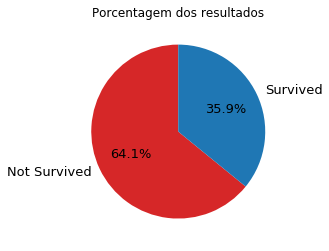

In [55]:
submissao['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'),
                                             title='Porcentagem dos resultados',
                                             fontsize=13, shadow=False, startangle=90, autopct="%1.1f%%",
                                             labels=('Not Survived', 'Survived'),
                                             figsize=(6,4)).set_ylabel('')